In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [64]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

import numpy as np 
import tensorflow as tf
import pandas as pd
from tqdm import tqdm
import os
from cv2 import imread, createCLAHE 
import cv2
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import clear_output
from tensorflow.keras.optimizers import Adam 
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [65]:

data_dir  = '../content/drive/MyDrive/Garbage classification dataset/Garbage classification'

classes = os.listdir(data_dir)
print(classes)


['cardboard', 'plastic', 'trash', 'metal', 'glass', 'paper']


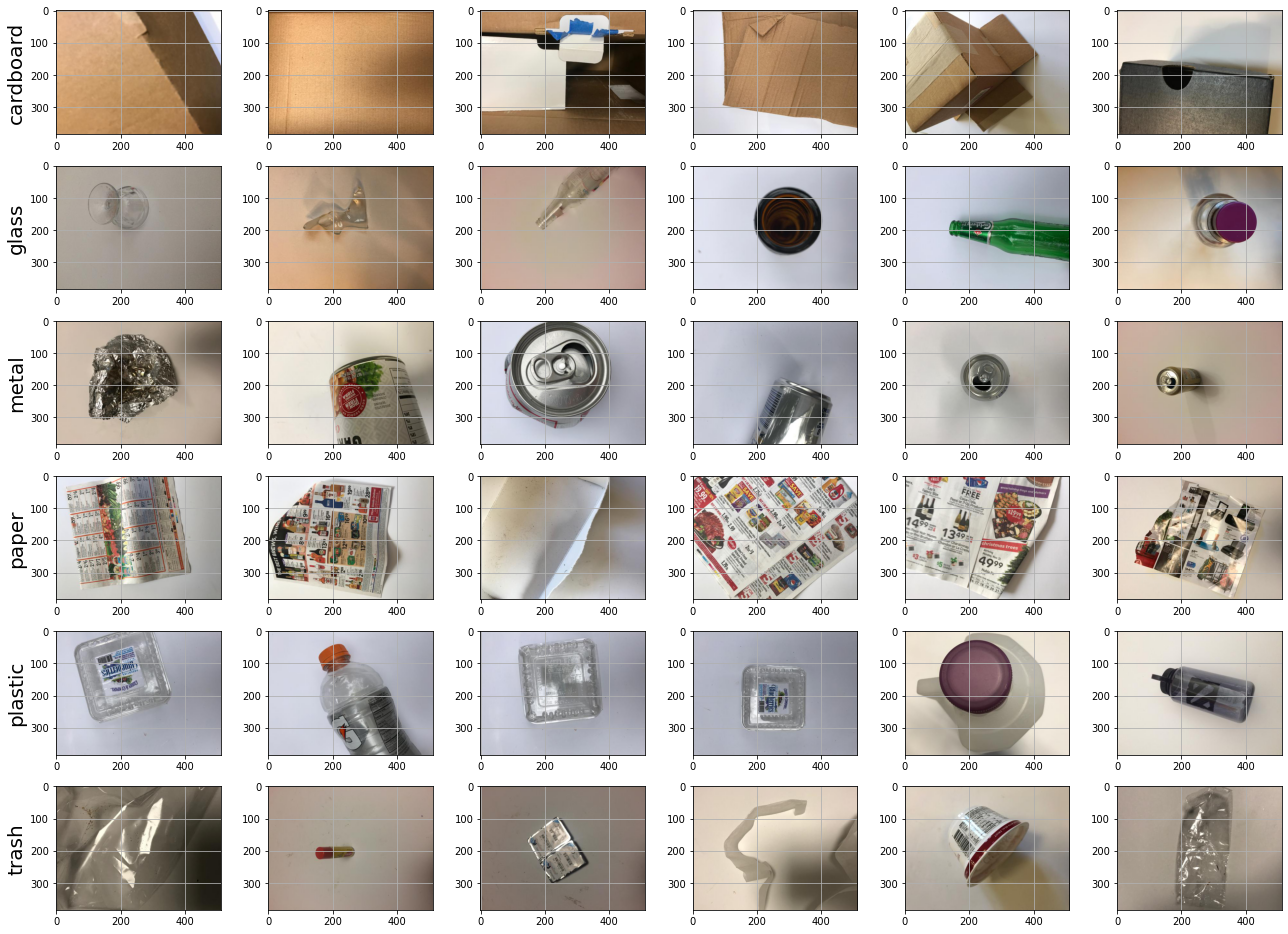

In [66]:
plt.figure(figsize=(30,15))

for i in range(len(labels)):
    directory = os.path.join(data_dir, labels[i])
    for j in range(6):
        path = os.path.join(directory, os.listdir(directory)[j])
        img = mpimg.imread(path)
        
        plt.subplot(7, 10, i*10 + j + 1)
        plt.imshow(img)
        
        if j == 0:
            plt.ylabel(labels[i], fontsize=20)
        
#plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
plt.tight_layout()
plt.show()

In [67]:
#size of a single image
directory = os.path.join(data_dir, 'paper')
path = os.path.join(directory, os.listdir(directory)[5])
image = mpimg.imread(path)
image.shape

(384, 512, 3)

In [68]:
# load the InceptionResNetV2 architecture with imagenet weights as base
base_model = tf.keras.applications.InceptionResNetV2(
					include_top=False,
					weights='imagenet',
					input_shape=(384,512,3)
					)

base_model.trainable=False
# For freezing the layer we make use of layer.trainable = False
# means that its internal state will not change during training.
# model's trainable weights will not be updated during fit(),
# and also its state updates will not run.

model = tf.keras.Sequential([
		base_model,
		tf.keras.layers.BatchNormalization(renorm=True),
		tf.keras.layers.GlobalAveragePooling2D(),
		tf.keras.layers.Dense(512, activation='relu'),
		tf.keras.layers.Dense(256, activation='relu'),
		tf.keras.layers.Dropout(0.5),
		tf.keras.layers.Dense(128, activation='relu'),
		tf.keras.layers.Dense(120, activation='softmax')
	])


In [69]:

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 10, 14, 1536)     54336736  
 onal)                                                           
                                                                 
 batch_normalization_1234 (B  (None, 10, 14, 1536)     10752     
 atchNormalization)                                              
                                                                 
 global_average_pooling2d_5   (None, 1536)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_22 (Dense)            (None, 512)               786944    
                                                                 
 dense_23 (Dense)            (None, 256)               131328    
                                                      

In [70]:
# creating generators for combining data and increasing the gainable insights by slightly modifying the images in the dataset

train_datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,
                                   rotation_range=15,zoom_range=0.1,
                                   width_shift_range=0.15,height_shift_range=0.15,
                                   shear_range=0.1,
                                   fill_mode="nearest",
                                   rescale=1./255., 
                                   validation_split=0.2)

train_generator = train_datagen.flow_from_directory(data_dir, target_size=(384, 512), batch_size=32, class_mode='binary', subset='training')
validation_generator = train_datagen.flow_from_directory(data_dir, target_size=(384, 512), batch_size=32, class_mode='binary', subset='validation')

Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.


In [71]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate = 0.001), metrics=['accuracy'])

In [72]:
early = tf.keras.callbacks.EarlyStopping( patience=10,
										min_delta=0.001,
										restore_best_weights=True)
# early stopping call back


In [73]:
history = model.fit(train_generator, epochs=15, verbose=15, validation_data=validation_generator, callbacks=[early])

Epoch 1/15
Epoch 2/15
Epoch 3/15
Epoch 4/15
Epoch 5/15
Epoch 6/15
Epoch 7/15
Epoch 8/15
Epoch 9/15
Epoch 10/15
Epoch 11/15
Epoch 12/15
Epoch 13/15
Epoch 14/15
Epoch 15/15


Text(0, 0.5, 'LOSS')

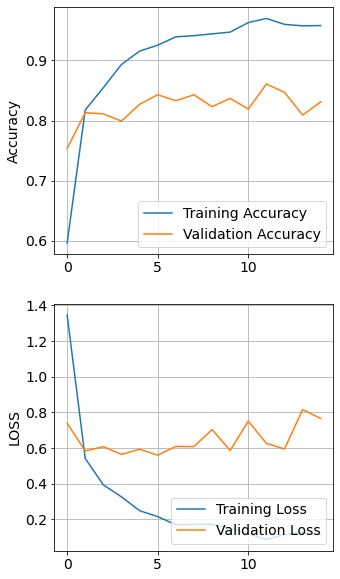

In [74]:
# store results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


# plot results
# accuracy
plt.figure(figsize=(5, 10))
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.facecolor'] = 'white'
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='lower right')
plt.ylabel('LOSS')




In [86]:
labels = ['cardboard','glass','metal', 'paper', 'plastic', 'trash']
for label in labels:
    directory = os.path.join(data_dir, label)
    print("Images of label \"" + label + "\":\t", len(os.listdir(directory)))

Images of label "cardboard":	 403
Images of label "glass":	 501
Images of label "metal":	 410
Images of label "paper":	 594
Images of label "plastic":	 482
Images of label "trash":	 137


In [87]:
print("Accuracy=",acc)
print("Loss=",loss)

Accuracy= [0.5963438749313354, 0.8176877498626709, 0.8547430634498596, 0.8932806253433228, 0.915513813495636, 0.9253952503204346, 0.9392292499542236, 0.9412055611610413, 0.9441699385643005, 0.9471343755722046, 0.9629446864128113, 0.9698616862297058, 0.9599802494049072, 0.9575098752975464, 0.9580039381980896]
Loss= [1.3467553853988647, 0.5411735773086548, 0.3931232690811157, 0.3259674310684204, 0.2483363151550293, 0.2151256501674652, 0.16997919976711273, 0.1716945320367813, 0.17213167250156403, 0.1500074565410614, 0.11904962360858917, 0.08642098307609558, 0.11465860158205032, 0.12659595906734467, 0.11276572197675705]


In [88]:
print("Val_Accuracy=",val_acc)
print("Val_Loss=",val_loss)

Val_Accuracy= [0.7534791231155396, 0.8131212592124939, 0.8111332058906555, 0.7992047667503357, 0.8270377516746521, 0.8429423570632935, 0.833001971244812, 0.8429423570632935, 0.8230616450309753, 0.8369781374931335, 0.8190854787826538, 0.8608350157737732, 0.8469184637069702, 0.8091451525688171, 0.8310139179229736]
Val_Loss= [0.7388651967048645, 0.5838388204574585, 0.6074829697608948, 0.5641346573829651, 0.5933981537818909, 0.5597555637359619, 0.6090382933616638, 0.6083406209945679, 0.703274667263031, 0.586441695690155, 0.7509782910346985, 0.6260116100311279, 0.5946151614189148, 0.8159904479980469, 0.7657440900802612]


Enter any category by index: 3
Enter any index to test: 86
1/1 [==============================] - 0s 71ms/step


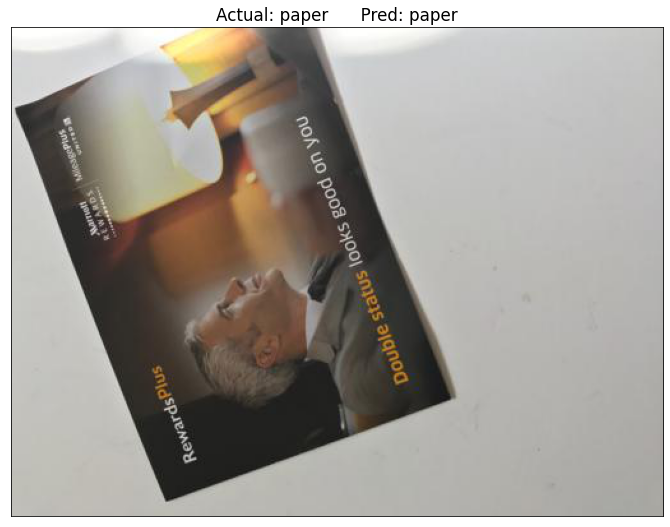

In [90]:
67
cat = int(input('Enter any category by index: '))
ind = int(input('Enter any index to test: '))

directory = os.path.join(data_dir, labels[cat % 6])
try:
    path = os.path.join(directory, os.listdir(directory)[ind])
    img = mpimg.imread(path)
    x = keras.preprocessing.image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images)
    pred = labels[np.argmax(classes)]
    
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.title('Actual: {}      Pred: {}'.format(labels[cat], pred))
    
except:
    print('Invalid Value')
